In [116]:
# Task 1
import pandas as pd 

meta = pd.read_csv('./owid-covid-data.csv')
meta['date'] = pd.to_datetime(meta['date'])
#meta.dtypes
meta

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,3.983543e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,3.983543e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,3.983543e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,3.983543e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,3.983543e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125963,OWID_WRL,NaN,World,2021-07-28,196060647.0,644061.0,566587.000,4191147.0,10235.0,8714.143,24896.698,81.786,71.948,532.211,1.300,1.107,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.035686e+09,2.188813e+09,890828891.0,6983043.0,42068113.0,37006146.0,51.25,27.79,11.31,0.09,4699.0,NaN,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
125964,OWID_WRL,NaN,World,2021-07-29,196713731.0,653084.0,579244.429,4201978.0,10831.0,9009.857,24979.630,82.932,73.555,533.587,1.375,1.144,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.082350e+09,2.204740e+09,903353852.0,7206386.0,46663658.0,38028920.0,51.84,28.00,11.47,0.09,4829.0,NaN,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,

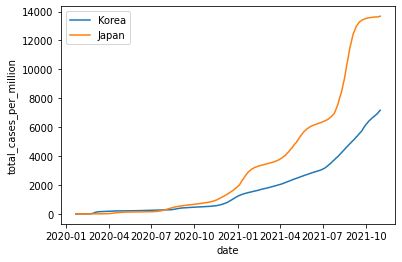

In [117]:
# Task 2
import matplotlib.pyplot as plt
task2_data = meta[['location', 'date', 'total_cases_per_million', 'new_cases_per_million', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']]
korea_meta = task2_data.loc[task2_data['location'] == 'South Korea', :]
japan_meta = task2_data.loc[task2_data['location'] == 'Japan', :]

# Task 2-1. 날짜별 확진자 비율 (total_cases_per_million) 시각화
korea_case_meta = korea_meta[['date', 'total_cases_per_million']].dropna()
japan_case_meta = japan_meta[['date', 'total_cases_per_million']].dropna()
plt.plot(korea_case_meta['date'], korea_case_meta['total_cases_per_million'], label='Korea')
plt.plot(japan_case_meta['date'], japan_case_meta['total_cases_per_million'], label='Japan')
plt.xlabel('date')
plt.ylabel('total_cases_per_million')
plt.legend(loc="upper left")
plt.show()

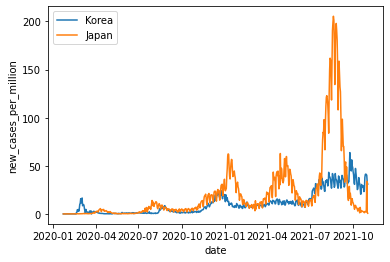

In [3]:
# Task 2-2. 날짜별 신규 확진자 비율 (new_cases_per_million) 시각화
korea_new_case_meta = korea_meta[['date', 'new_cases_per_million']].dropna()
japan_new_case_meta = japan_meta[['date', 'new_cases_per_million']].dropna()

plt.plot(korea_new_case_meta['date'], korea_new_case_meta['new_cases_per_million'], label='Korea')
plt.plot(japan_new_case_meta['date'], japan_new_case_meta['new_cases_per_million'], label='Japan')
plt.xlabel('date')
plt.ylabel('new_cases_per_million')
plt.legend(loc="upper left")
plt.show()

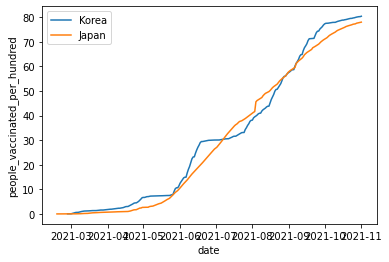

In [4]:
# Task 2-3. 날짜별 백신 접종자 비율 (people_vaccinated_per_hundred) 시각화
import matplotlib.ticker as ticker

korea_vaccin_meta = korea_meta[['date', 'people_vaccinated_per_hundred']].dropna()
japan_vaccin_meta = japan_meta[['date', 'people_vaccinated_per_hundred']].dropna()

plt.plot(korea_vaccin_meta['date'], korea_vaccin_meta['people_vaccinated_per_hundred'], label='Korea')
plt.plot(japan_vaccin_meta['date'], japan_vaccin_meta['people_vaccinated_per_hundred'], label='Japan')
plt.xlabel('date')
plt.ylabel('people_vaccinated_per_hundred')
plt.legend(loc="upper left")
plt.show()

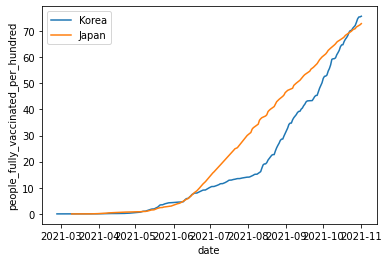

In [5]:
# Task 2-4. 날짜별 백신 접종 완료자 비율 (people_fully_vaccinated_per_hundred)

korea_full_vaccin_meta = korea_meta[['date', 'people_fully_vaccinated_per_hundred']].dropna()
japan_full_vaccin_meta = japan_meta[['date', 'people_fully_vaccinated_per_hundred']].dropna()

plt.plot(korea_full_vaccin_meta['date'], korea_full_vaccin_meta['people_fully_vaccinated_per_hundred'], label='Korea')
plt.plot(japan_full_vaccin_meta['date'], japan_full_vaccin_meta['people_fully_vaccinated_per_hundred'], label='Japan')
plt.xlabel('date')
plt.ylabel('people_fully_vaccinated_per_hundred')
plt.legend(loc="upper left")
plt.show()

In [107]:
# Task 3 백신 접종률(people_vaccinated_per_hundred)과 확진자 비율 대비 사망자 비율(total_deaths_per_million/total_cases_per_million) 사이의 상관관계 알아보기
# Task 3-1. 새로운 데이터 프레임 생성 
task3_data = meta[['location', 'date', 'total_deaths_per_million', 
                   'total_cases_per_million', 'people_vaccinated_per_hundred', 
                   'human_development_index' ]]
task3_data

,location,date,total_deaths_per_million,total_cases_per_million,people_vaccinated_per_hundred,human_development_index
0,Afghanistan,2020-02-24,NaN,0.126,NaN,0.511
1,Afghanistan,2020-02-25,NaN,0.126,NaN,0.511
2,Afghanistan,2020-02-26,NaN,0.126,NaN,0.511
3,Afghanistan,2020-02-27,NaN,0.126,NaN,0.511
4,Afghanistan,2020-02-28,NaN,0.126,NaN,0.511
...,...,...,...,...,...,...
125963,World,2021-07-28,532.211,24896.698,27.79,0.737
125964,World,2021-07-29,533.587,24979.630,28.00,0.737
125965,World,2021-07-30,534.811,25072.314,28.17,0.737
125966,World,2021-07-31,535.924,25136.933,28.31,0.737


In [19]:
# Task 3-2. 각 국가별로 가장 최근 날짜의 데이터 추출하기
grouped_data = task3_data.groupby('location').max()
grouped_data

,date,total_deaths_per_million,total_cases_per_million,people_vaccinated_per_hundred,human_development_index
location,,,,,
Afghanistan,2021-11-01,182.777,3923.241,6.06,0.511
Africa,2021-11-01,159.008,6191.136,8.93,NaN
Albania,2021-11-01,1020.211,64567.094,35.29,0.795
Algeria,2021-11-01,132.776,4629.799,14.26,0.748
Andorra,2021-11-01,1680.585,200584.327,70.30,0.868
...,...,...,...,...,...
Vatican,2021-11-01,NaN,33251.232,NaN,NaN
Venezuela,2021-11-01,170.772,14208.910,34.58,0.711
Vietnam,2021-11-01,225.438,9440.064,58.40,0.704


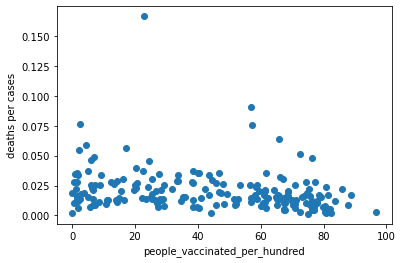

In [114]:
new_meta = grouped_data[['people_vaccinated_per_hundred', 'total_deaths_per_million', 'total_cases_per_million']].dropna()

plt.scatter(new_meta['people_vaccinated_per_hundred'], new_meta['total_deaths_per_million']/new_meta['total_cases_per_million'])
plt.xlabel('people_vaccinated_per_hundred')
plt.ylabel('deaths per cases')
plt.show()


In [30]:
# Task 3-4. 백신 접종률과 확진자 비율 대비 사망자 비율 사이의 상관계수 (Pearson Correlation Coefficient) 구하기 (함수 직접 구현)- 결측값제거 
import numpy as np
def pearson_similarity(u1, u2):
    u1_c = u1 - u1.mean()
    u2_c = u2 - u2.mean()
    denom = np.sqrt(np.sum(u1_c**2) * np.sum(u2_c**2))
    if denom != 0:
        return np.sum(u1_c * u2_c)/denom
    else:
        return 0

new_meta = grouped_data[['people_vaccinated_per_hundred', 'total_deaths_per_million', 'total_cases_per_million']].dropna()
pearson = pearson_similarity(new_meta['people_vaccinated_per_hundred'], new_meta['total_deaths_per_million']/new_meta['total_cases_per_million'])

print("Peason Correlation Coefficient: ", pearson)

Peason Correlation Coefficient:  -0.2332883755734088


In [31]:
# Task 4-1. Task 3-2에서 생성한 데이터프레임을 활용하여 HDI 계수와 백신 접종률 사이의 상관계수 (Pearson Correlation Coefficient) 구하기
vaccinated_rating = grouped_data['people_vaccinated_per_hundred']
HDI = grouped_data['human_development_index']
pearson = pearson_similarity(vaccinated_rating, HDI)

print("Peason Correlation Coefficient: ", pearson)

Peason Correlation Coefficient:  0.7200694955928683


In [85]:
# Task 4-2. Linear Regression 방법으로 HDI 계수와 백신 접종률 사이의 선형 관계 학습하기 (y = wx + b 에서 w값과 b값 구하기)
import torch

x_train = torch.FloatTensor([HDI])
y_train = torch.FloatTensor([vaccinated_rating])
w = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 0.07

for epoch in range(9001):
    w.requires_grad_(True)
    b.requires_grad_(True)

    hypothesis = torch.mul(x_train, w) + b
    cost = torch.mean((hypothesis - y_train) ** 2)

    cost.backward()
    with torch.no_grad() as grd:
        w = w - lr * w.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            if cost != None:
                print("epoch : {}, cost: {:.6f}, w: {}, b: {}".format(epoch, cost.item(), w.squeeze(), b.squeeze()))
                


epoch : 0, cost: 2571.990234, w: 4.81717586517334, b: 5.996100425720215
epoch : 100, cost: 491.604584, w: 44.61487579345703, b: 11.494673728942871
epoch : 200, cost: 411.912872, w: 63.562740325927734, b: -2.480153799057007
epoch : 300, cost: 358.524811, w: 79.07144165039062, b: -13.91845703125
epoch : 400, cost: 322.758423, w: 91.76522827148438, b: -23.2806453704834
epoch : 500, cost: 298.797363, w: 102.15499877929688, b: -30.943525314331055
epoch : 600, cost: 282.745056, w: 110.65898132324219, b: -37.2155647277832
epoch : 700, cost: 271.991089, w: 117.61943054199219, b: -42.349178314208984
epoch : 800, cost: 264.786743, w: 123.31649017333984, b: -46.550994873046875
epoch : 900, cost: 259.960266, w: 127.97953796386719, b: -49.99018096923828
epoch : 1000, cost: 256.726807, w: 131.79623413085938, b: -52.80515670776367
epoch : 1100, cost: 254.560638, w: 134.92015075683594, b: -55.109169006347656
epoch : 1200, cost: 253.109482, w: 137.47706604003906, b: -56.994998931884766
epoch : 1300, co

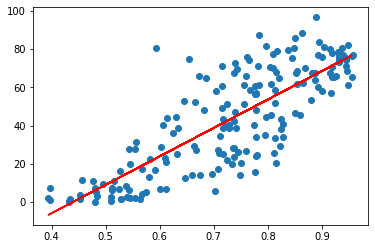

In [104]:
# Task 4-3. HDI 계수를 x축으로, 백신 접종률을 y축으로하는 scatter plot과, Task 4-2에서 학습한 직선을 겹쳐 그리기
HDI = grouped_data['human_development_index']
vaccinated_rating = grouped_data['people_vaccinated_per_hundred']
x = torch.FloatTensor(HDI)
y = torch.mul(x, w) + b
plt.plot(x,y, 'r-')
#plt.show()
plt.scatter(HDI, vaccinated_rating)
plt.show()